# Bedload activity analysis
---

In [1]:
import os
import sys
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import importlib

In [2]:
home_folder = os.getcwd()
path_stacks = os.path.join(home_folder, 'output_data','3_PiQs_BAW_2Dt_filter')
path_plots = os.path.join(home_folder,'plots')
set_names = {'q05':'q05_1', 'q07':'q07_1', 'q10':'q10_2', 'q15':'q15_2', 'q20':'q20_2'}

In [3]:
# Check if the folders already exist and create them
if not(os.path.exists(path_plots)):
    os.makedirs(path_plots)

# Display and save the final BAA map (run 9) for each experiment

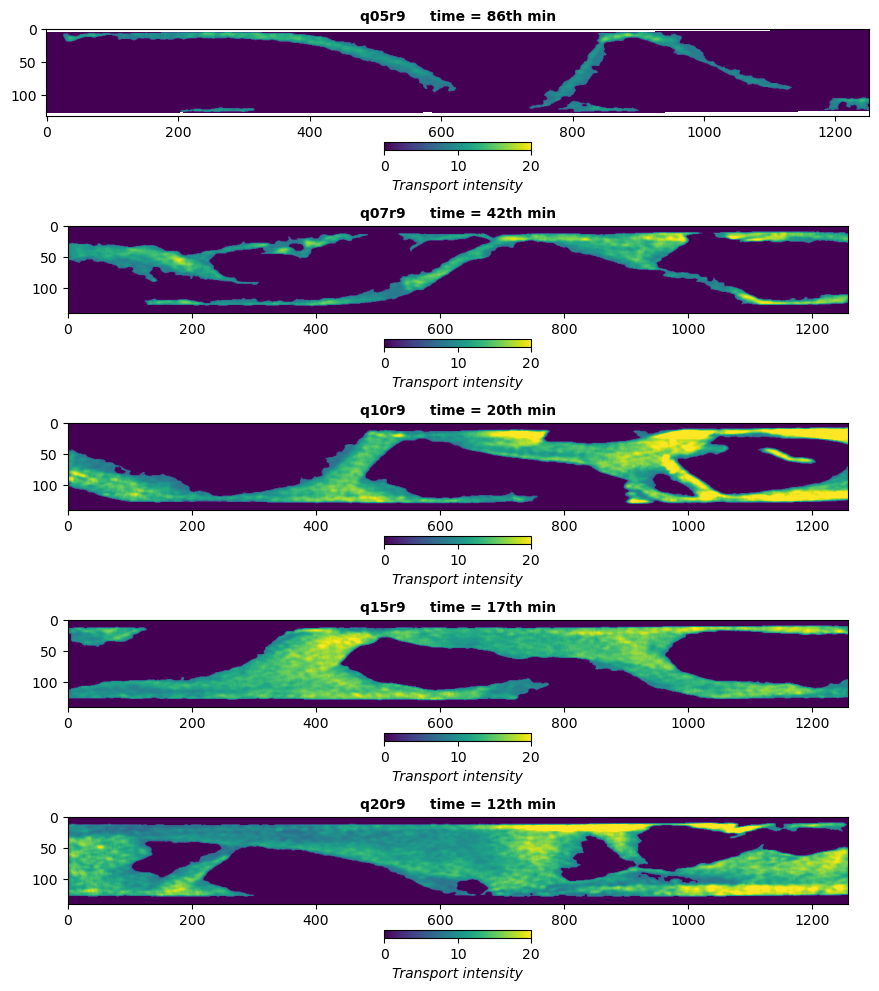

In [7]:
runs = ['q05r9','q07r9','q10r9','q15r9','q20r9']
nb_image = ['42','20','17','12']
%matplotlib inline
fig, axs = plt.subplots(len(runs),1,figsize=(15,10)) 
for i,run in enumerate(runs):
    if run == 'q05r9':
        filename = f'{run}_BAA_stack_LR5_cld.npy'
        path = os.path.join(path_stacks, set_names[run[0:3]], filename)
        stack = np.load(path)
        BAA_map = stack[-1,:,:] #keep only the last map
        time, dy, dx = np.shape(stack) # save the time of the last map
    else:
        filename = f'{run}_Img00{nb_image[i-1]}_ultimate_map_LR5.npy'
        path = os.path.join(home_folder, 'output_data', '1_PiQs_BAW_maps',filename)
        BAA_map = np.load(path)
        time = nb_image[i-1]
    #plot
    im = axs[i].imshow(BAA_map, cmap='viridis', vmin=0, vmax=20)
    axs[i].set_title(run + f'     time = {time}th min', fontweight='bold', fontsize=10)

    # Add colorbar
    cbar = fig.colorbar(im, ax=axs[i], orientation='horizontal', pad=0.2, shrink=0.1)  # adjust the pad value for spacing
    cbar.set_label('Transport intensity',fontstyle='italic', fontsize=10)
plt.tight_layout()
#plt.show()
#save the plot
plt.savefig(os.path.join(path_plots,'last_BAA_runs9.png'), dpi=300, bbox_inches='tight')